In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [5]:
df= pd.read_csv('insurance.csv')

In [6]:
df.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
#missing value check
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [9]:
#check duplicates
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


## Starting EDA(Explore Data Analysit) Process 

In [10]:
 df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

C:\Users\user\AppData\Local\Temp\ipykernel_12324\2728026880.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], ax=axes[0], kde = False)
C:\Users\user\AppData\Local\Temp\ipykernel_12324\2728026880.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], ax=axes[0], kde = False)
C:\Users

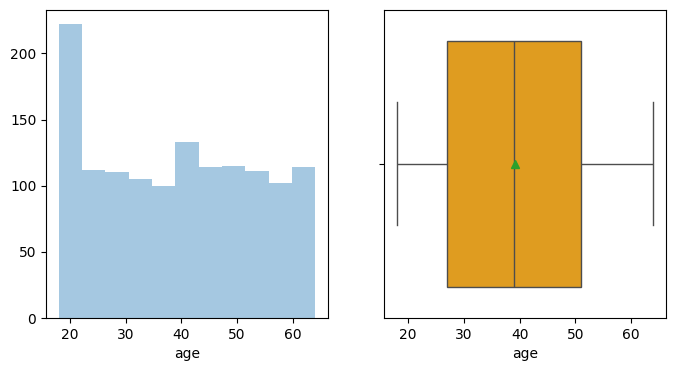

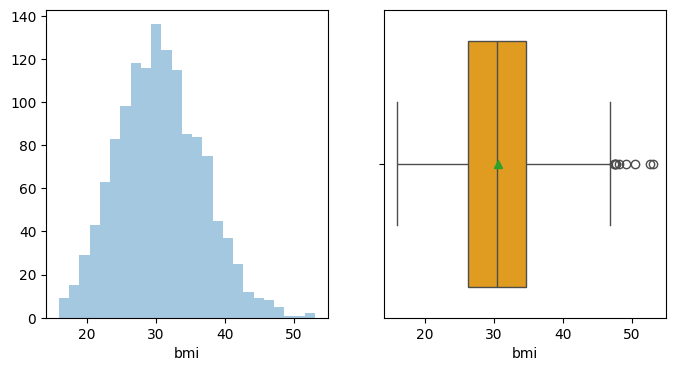

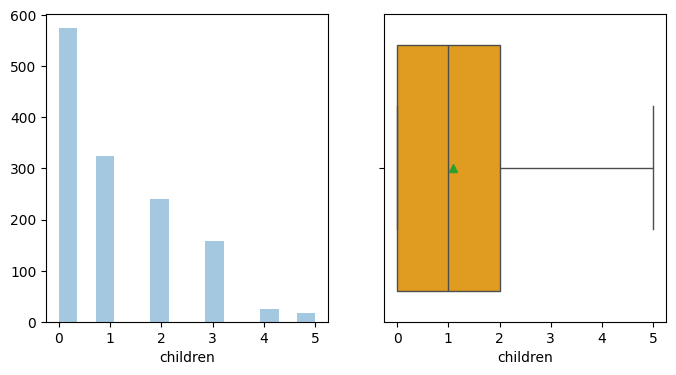

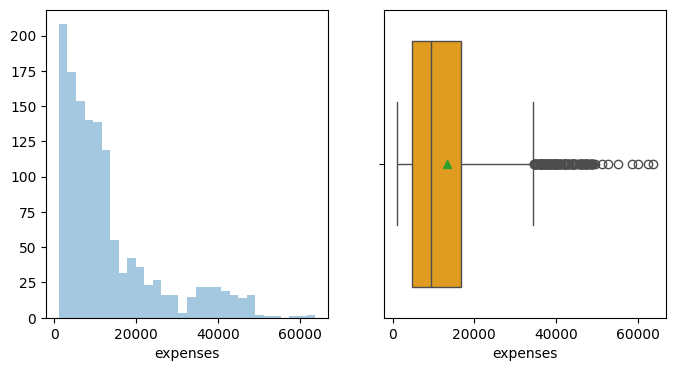

In [11]:
x_axis = ['age','bmi','children','expenses']
for x in x_axis:
    fig, axes = plt.subplots(1,2, figsize=(8,4))
    sns.distplot(df[x], ax=axes[0], kde = False)
    sns.boxplot(df[x], ax=axes[1], orient = "h",showmeans = True , color = "orange")

## Handel Categorical Columns

In [12]:
df['sex'] = df.sex.map({'female':0,'male':1})

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


In [14]:
df['smoker'] = df.smoker.map({'yes':0,'no':1})

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,southwest,16884.92
1,18,1,33.8,1,1,southeast,1725.55
2,28,1,33.0,3,1,southeast,4449.46
3,33,1,22.7,0,1,northwest,21984.47
4,32,1,28.9,0,1,northwest,3866.86


In [16]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
df['region'] = df.region.map({'southwest':0,'southeast':1,'northeast':2,'northwestt':3})

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,0.0,16884.92
1,18,1,33.8,1,1,1.0,1725.55
2,28,1,33.0,3,1,1.0,4449.46
3,33,1,22.7,0,1,NaN,21984.47
4,32,1,28.9,0,1,NaN,3866.86


In [19]:
df['region'] = df['region'].fillna(1)

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,0.0,16884.92
1,18,1,33.8,1,1,1.0,1725.55
2,28,1,33.0,3,1,1.0,4449.46
3,33,1,22.7,0,1,1.0,21984.47
4,32,1,28.9,0,1,1.0,3866.86


## Spilt the Dataset in X and Y

In [21]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [22]:
X = df.drop(['expenses'], axis=1)

In [23]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,0,0.0
1,18,1,33.8,1,1,1.0
2,28,1,33.0,3,1,1.0
3,33,1,22.7,0,1,1.0
4,32,1,28.9,0,1,1.0


In [24]:
Y = df[['expenses']]

In [25]:
Y.head()

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


## Now Train,Test Split Dataset

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [29]:
x_train.shape

(1070, 6)

In [30]:
x_test.shape

(268, 6)

In [31]:
y_train.shape

(1070, 1)

In [32]:
y_test.shape

(268, 1)

## Model Training

In [33]:
#Using Linear Regression
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()

In [35]:
lr.fit(x_train, y_train)

LinearRegression()

In [37]:
y_pred = lr.predict(x_test)

In [38]:
from sklearn.metrics import r2_score
score1 = r2_score(y_test, y_pred)

In [39]:
score1

0.7824148716059396

In [40]:
#Support Vector Regression
from sklearn.svm import SVR 

In [41]:
svm = SVR()

In [42]:
svm.fit(x_train, y_train)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [43]:
y_pred = svm.predict(x_test)

In [44]:
from sklearn.metrics import r2_score
score1 = r2_score(y_test, y_pred)

In [45]:
score1

-0.07230344822156276

In [46]:
## RandomForest Regression
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [47]:
rf.fit(x_train, y_train)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [50]:
y_pred3 = rf.predict(x_test)
score3 = r2_score(y_test, y_pred3)

In [51]:
score3

0.8567563292175573

## By Testing all the models RandomForest is BestFit Model

In [52]:
rf.fit(x_train,y_train)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

## Now Predict or Test the Model with New Dataset

In [58]:
data = {
    'age':23, 'sex':1, 'bmi':30, 'children':1, 'smoker':0.1, 'region':2
}
new_df = pd.DataFrame(data, index = [0])
new_df
    

,age,sex,bmi,children,smoker,region
0,23,1,30,1,0.1,2


In [59]:
pred = rf.predict(new_df)
pred[0]

30042.685499999974

## Saving the Model

In [60]:
import joblib
joblib.dump(rf, 'random_forest_regressor')

['random_forest_regressor']